<a href="https://colab.research.google.com/github/darshanvjani/Kickstarter-Campaigns-Analysis/blob/main/Initial_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

In [ ]:
!pip install xgboost==1.3.3
!pip install catboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import os
import re
import string

from sklearn.preprocessing        import LabelEncoder, StandardScaler
from sklearn.model_selection      import train_test_split, StratifiedKFold, KFold
from sklearn.linear_model         import LogisticRegression
from sklearn.tree                 import DecisionTreeClassifier
from sklearn.ensemble             import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from lightgbm                     import LGBMClassifier
from xgboost                      import XGBClassifier
from catboost                     import CatBoostClassifier
from sklearn.metrics              import accuracy_score,f1_score

# le = LabelEncoder()

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)

# data_path = '/content/'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics              import accuracy_score,f1_score


In [ ]:
full_2 = pd.read_csv('/content/drive/MyDrive/257/ML Project/full_2.csv')
full_2.drop(['Unnamed: 0'],axis=1,inplace=True)
full_2.head()

,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,currency_symbol,...,created_at_weekday_Thursday,created_at_weekday_Tuesday,created_at_weekday_Wednesday,launched_at_weekday_Friday,launched_at_weekday_Monday,launched_at_weekday_Saturday,launched_at_weekday_Sunday,launched_at_weekday_Thursday,launched_at_weekday_Tuesday,launched_at_weekday_Wednesday
0,Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,USD,$,...,0,0,0,0,0,0,0,0,0,1
1,Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,USD,$,...,0,0,0,0,1,0,0,0,0,0
2,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,US,USD,$,...,0,0,0,0,0,0,1,0,0,0
3,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,US,USD,$,...,0,0,0,0,0,1,0,0,0,0
4,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,DE,EUR,€,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
full_2['goal'].head()

0      1500.0
1       500.0
2    100000.0
3      5000.0
4      3222.0
Name: goal, dtype: float64

In [ ]:
full_2

,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,currency_symbol,...,created_at_weekday_Thursday,created_at_weekday_Tuesday,created_at_weekday_Wednesday,launched_at_weekday_Friday,launched_at_weekday_Monday,launched_at_weekday_Saturday,launched_at_weekday_Sunday,launched_at_weekday_Thursday,launched_at_weekday_Tuesday,launched_at_weekday_Wednesday
0,Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,USD,$,...,0,0,0,0,0,0,0,0,0,1
1,Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,USD,$,...,0,0,0,0,1,0,0,0,0,0
2,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,US,USD,$,...,0,0,0,0,0,0,1,0,0,0
3,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,US,USD,$,...,0,0,0,0,0,1,0,0,0,0
4,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,DE,EUR,€,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20627,"StorySnap: Your voice, their stories... in a s...",The easy way to be present for story time anyt...,32500.0,25868.0,failed,storysnap-your-voice-their-stories-in-a-snap,False,CH,CHF,Fr,...,0,0,0,0,0,0,0,0,0,1
20628,Smart Fit!,A revolutionary App that makes getting fit as ...,100000.0,1559.0,failed,smart-fit,False,DE,EUR,€,...,0,1,0,0,0,0,0,0,1,0
20629,Sloth Face App,"We all love fatbooth and Ugly booth, why not s...",10000.0,0.0,failed,sloth-face-app,False,US,USD,$,...,1,0,0,1,0,0,0,0,0,0
20630,DriverTools,Production android app for cab drivers and tru...,2500.0,0.0,failed,drivertools,False,US,USD,$,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
full_2

,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,currency_symbol,...,created_at_weekday_Thursday,created_at_weekday_Tuesday,created_at_weekday_Wednesday,launched_at_weekday_Friday,launched_at_weekday_Monday,launched_at_weekday_Saturday,launched_at_weekday_Sunday,launched_at_weekday_Thursday,launched_at_weekday_Tuesday,launched_at_weekday_Wednesday
0,Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,USD,$,...,0,0,0,0,0,0,0,0,0,1
1,Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,USD,$,...,0,0,0,0,1,0,0,0,0,0
2,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,US,USD,$,...,0,0,0,0,0,0,1,0,0,0
3,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,US,USD,$,...,0,0,0,0,0,1,0,0,0,0
4,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,DE,EUR,€,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20627,"StorySnap: Your voice, their stories... in a s...",The easy way to be present for story time anyt...,32500.0,25868.0,failed,storysnap-your-voice-their-stories-in-a-snap,False,CH,CHF,Fr,...,0,0,0,0,0,0,0,0,0,1
20628,Smart Fit!,A revolutionary App that makes getting fit as ...,100000.0,1559.0,failed,smart-fit,False,DE,EUR,€,...,0,1,0,0,0,0,0,0,1,0
20629,Sloth Face App,"We all love fatbooth and Ugly booth, why not s...",10000.0,0.0,failed,sloth-face-app,False,US,USD,$,...,1,0,0,1,0,0,0,0,0,0
20630,DriverTools,Production android app for cab drivers and tru...,2500.0,0.0,failed,drivertools,False,US,USD,$,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# full_2.heqad
full_2['state'].value_counts()

failed        11416
successful     6018
canceled       2460
live            508
suspended       230
Name: state, dtype: int64

In [ ]:
sum(full_2.isna().sum())

1959

removing unnecessor features for the base model

In [ ]:
full_2['state'].value_counts()

failed        11416
successful     6018
canceled       2460
live            508
suspended       230
Name: state, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
full_2['state_lb'] = LabelEncoder().fit_transform(full_2['state'])
full_2['state_lb'].value_counts()

1    11416
3     6018
0     2460
2      508
4      230
Name: state_lb, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
full_2['currency_lb'] = LabelEncoder().fit_transform(full_2['currency'])
full_2['currency_lb'].value_counts()

12    14141
5      2498
4      1618
1      1098
0       674
3       123
9       111
10       96
2        94
8        64
7        55
6        35
11       25
Name: currency_lb, dtype: int64

In [ ]:
full_2['profile'].head()

0    {"background_image_opacity":0.8,"should_show_f...
1    {"background_image_opacity":0.8,"should_show_f...
2    {"background_image_opacity":0.8,"should_show_f...
3    {"background_image_opacity":0.8,"should_show_f...
4    {"background_image_opacity":0.8,"should_show_f...
Name: profile, dtype: object

In [ ]:
full_3 = full_2.drop(['name','blurb','state','slug', 'disable_communication', 'country', 'currency', 'currency_symbol', 'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'staff_pick' , 'creator', 'location', 'category' ,'profile', 'spotlight', 'urls', 'source_url', 'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday', 'create_to_launch' ,'launch_to_deadline' ,'launch_to_state_change'],axis=1)

In [ ]:
# full_3.drop(['currency'],axis=1,inplace=True)

In [ ]:
full_3.shape

(20632, 117)

In [ ]:
full_3.head()

,goal,pledged,backers_count,static_usd_rate,usd_pledged,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_month,...,created_at_weekday_Wednesday,launched_at_weekday_Friday,launched_at_weekday_Monday,launched_at_weekday_Saturday,launched_at_weekday_Sunday,launched_at_weekday_Thursday,launched_at_weekday_Tuesday,launched_at_weekday_Wednesday,state_lb,currency_lb
0,1500.0,0.0,0,1.000000,0.000000,11.0,9.0,21.0,16.0,1,...,0,0,0,0,0,0,0,1,1,12
1,500.0,0.0,0,1.000000,0.000000,4.0,4.0,23.0,15.0,5,...,0,0,1,0,0,0,0,0,1,12
2,100000.0,120.0,5,1.000000,120.000000,8.0,8.0,18.0,10.0,3,...,0,0,0,0,1,0,0,0,1,12
3,5000.0,0.0,0,1.000000,0.000000,7.0,6.0,21.0,13.0,10,...,0,0,0,1,0,0,0,0,1,12
4,3222.0,356.0,17,1.114613,396.802395,7.0,7.0,18.0,18.0,6,...,1,0,0,0,0,1,0,0,1,4


In [ ]:
for x in range(117):
  print(full_3.iloc[1,x]," ", full_3.iloc[:,x].dtype)

500.0   float64
0.0   float64
0   int64
1.0   float64
0.0   float64
4.0   float64
4.0   float64
23.0   float64
15.0   float64
5   int64
1   int64
2015   int64
16   int64
5   int64
1   int64
2015   int64
16   int64
2   int64
20   int64
2015   int64
9   int64
3   int64
2   int64
2015   int64
16   int64
10   int64
60   int64
60   int64
0   int64
1   int64
1   int64
0   int64
0   int64
1   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
1   int64
1   int64
0   int64
0   int64
0   int64
0   int64
0   int64
1   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
1   int64
0   int64
0   int64
0   int64
0   int64
0   int64
0   int64
1   i

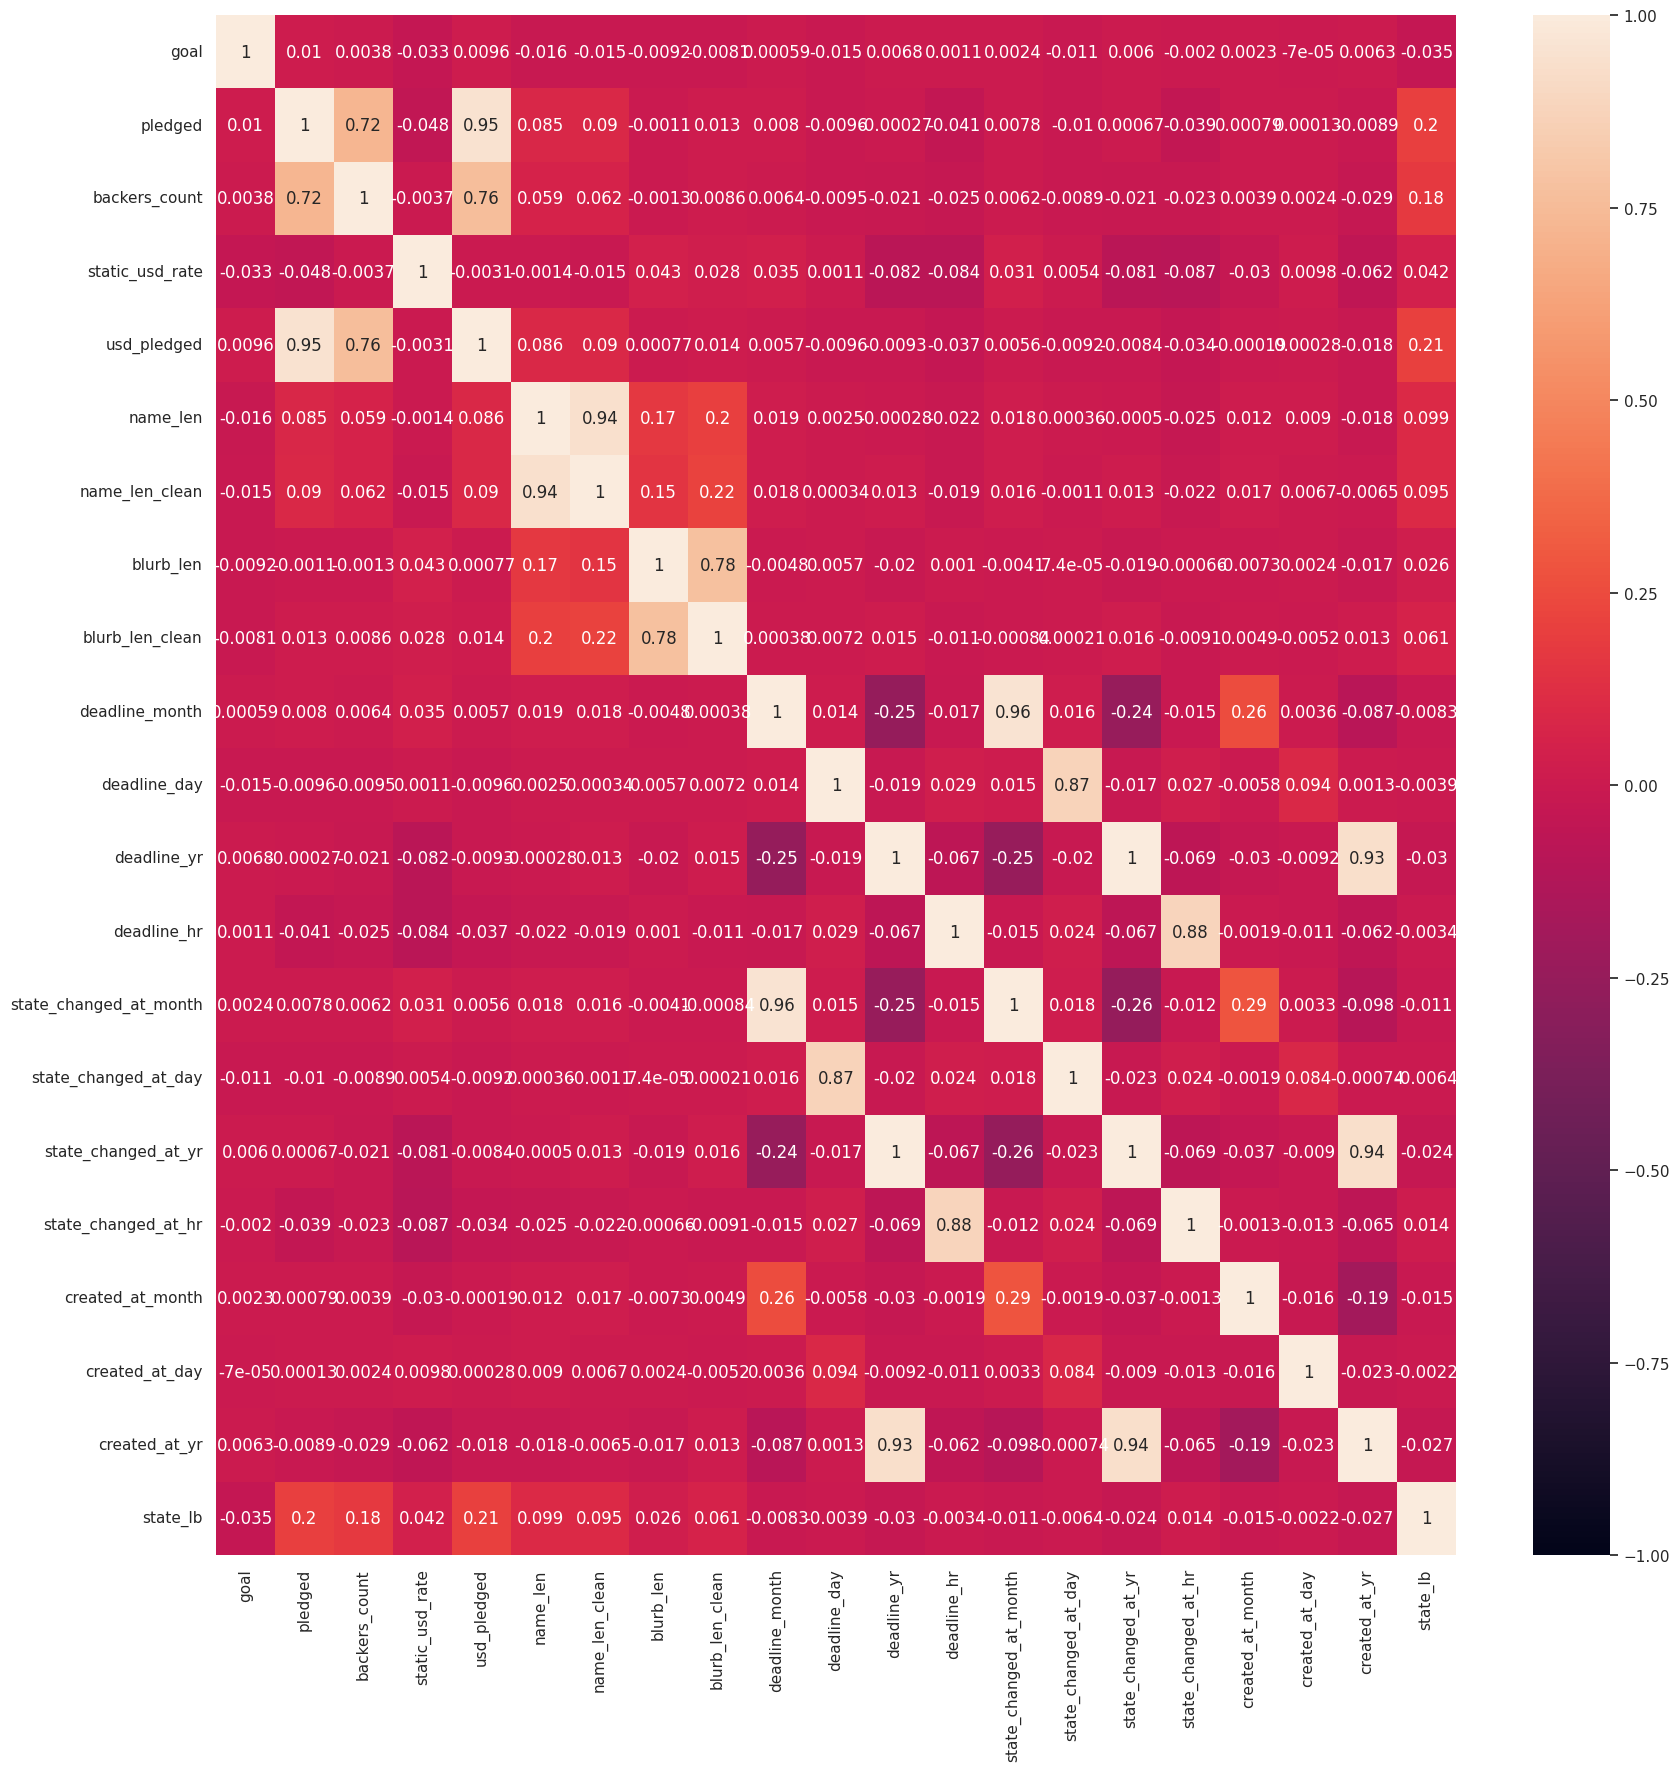

In [ ]:
display_df = pd.concat([full_3.iloc[:,:20], full_3['state_lb']], axis=1)
display_df.head()
fig, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(display_df.corr(), vmin=-1, vmax=1, annot=True)

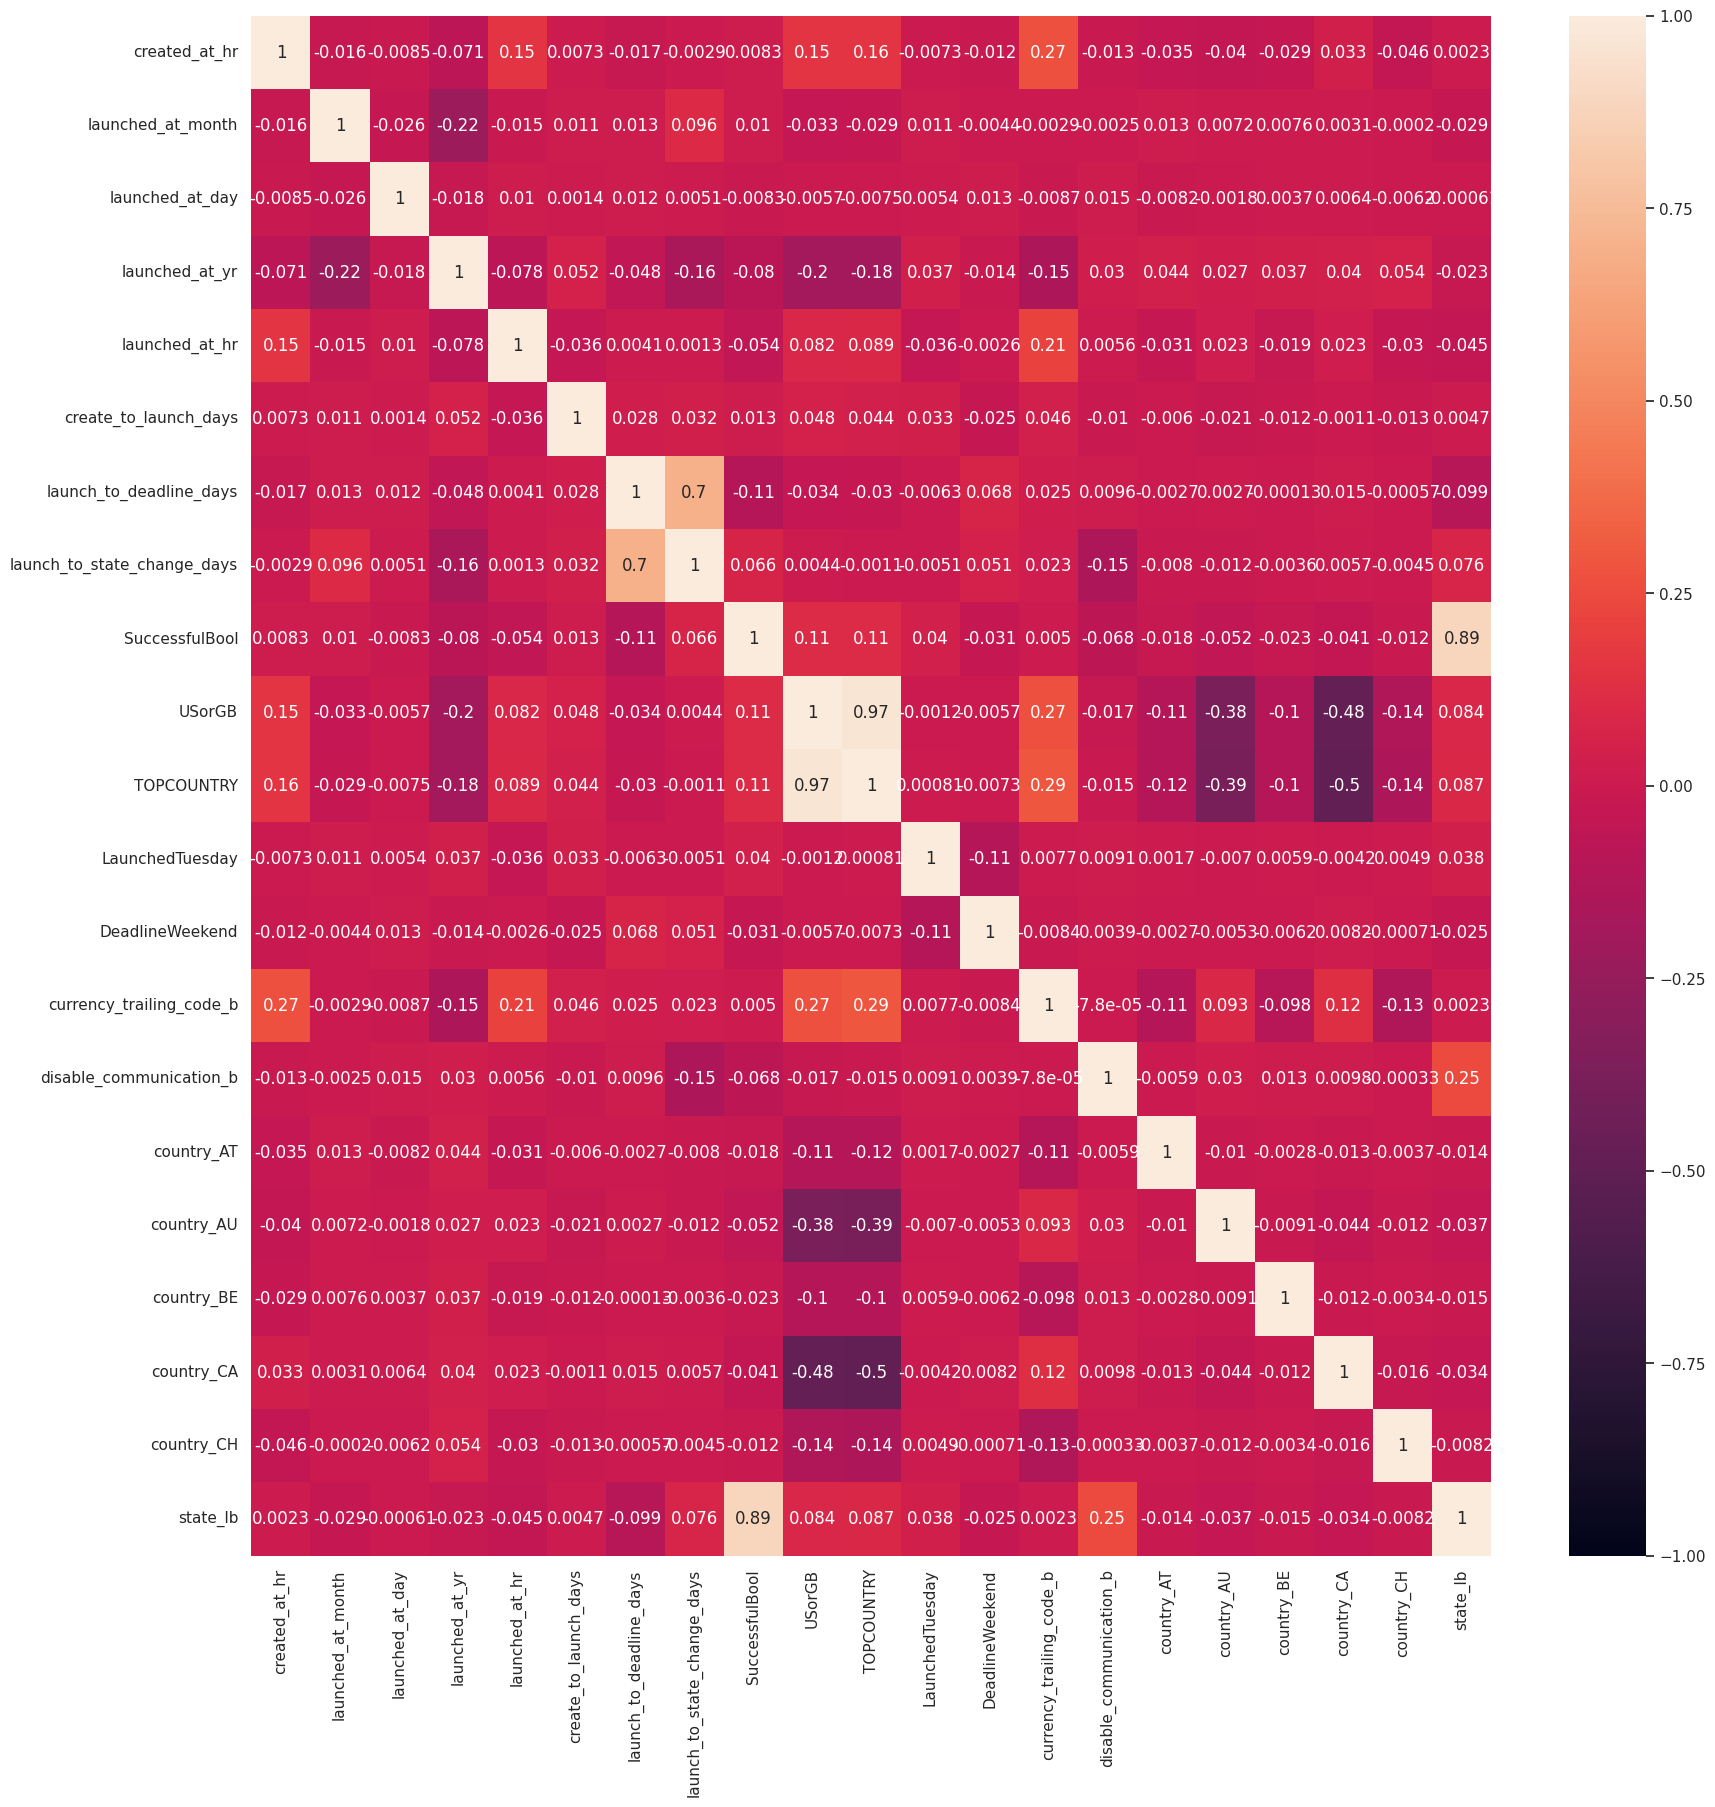

In [ ]:
display_df = pd.concat([full_3.iloc[:,20:40], full_3['state_lb']], axis=1)
display_df.head()
fig, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(display_df.corr(), vmin=-1, vmax=1, annot=True)

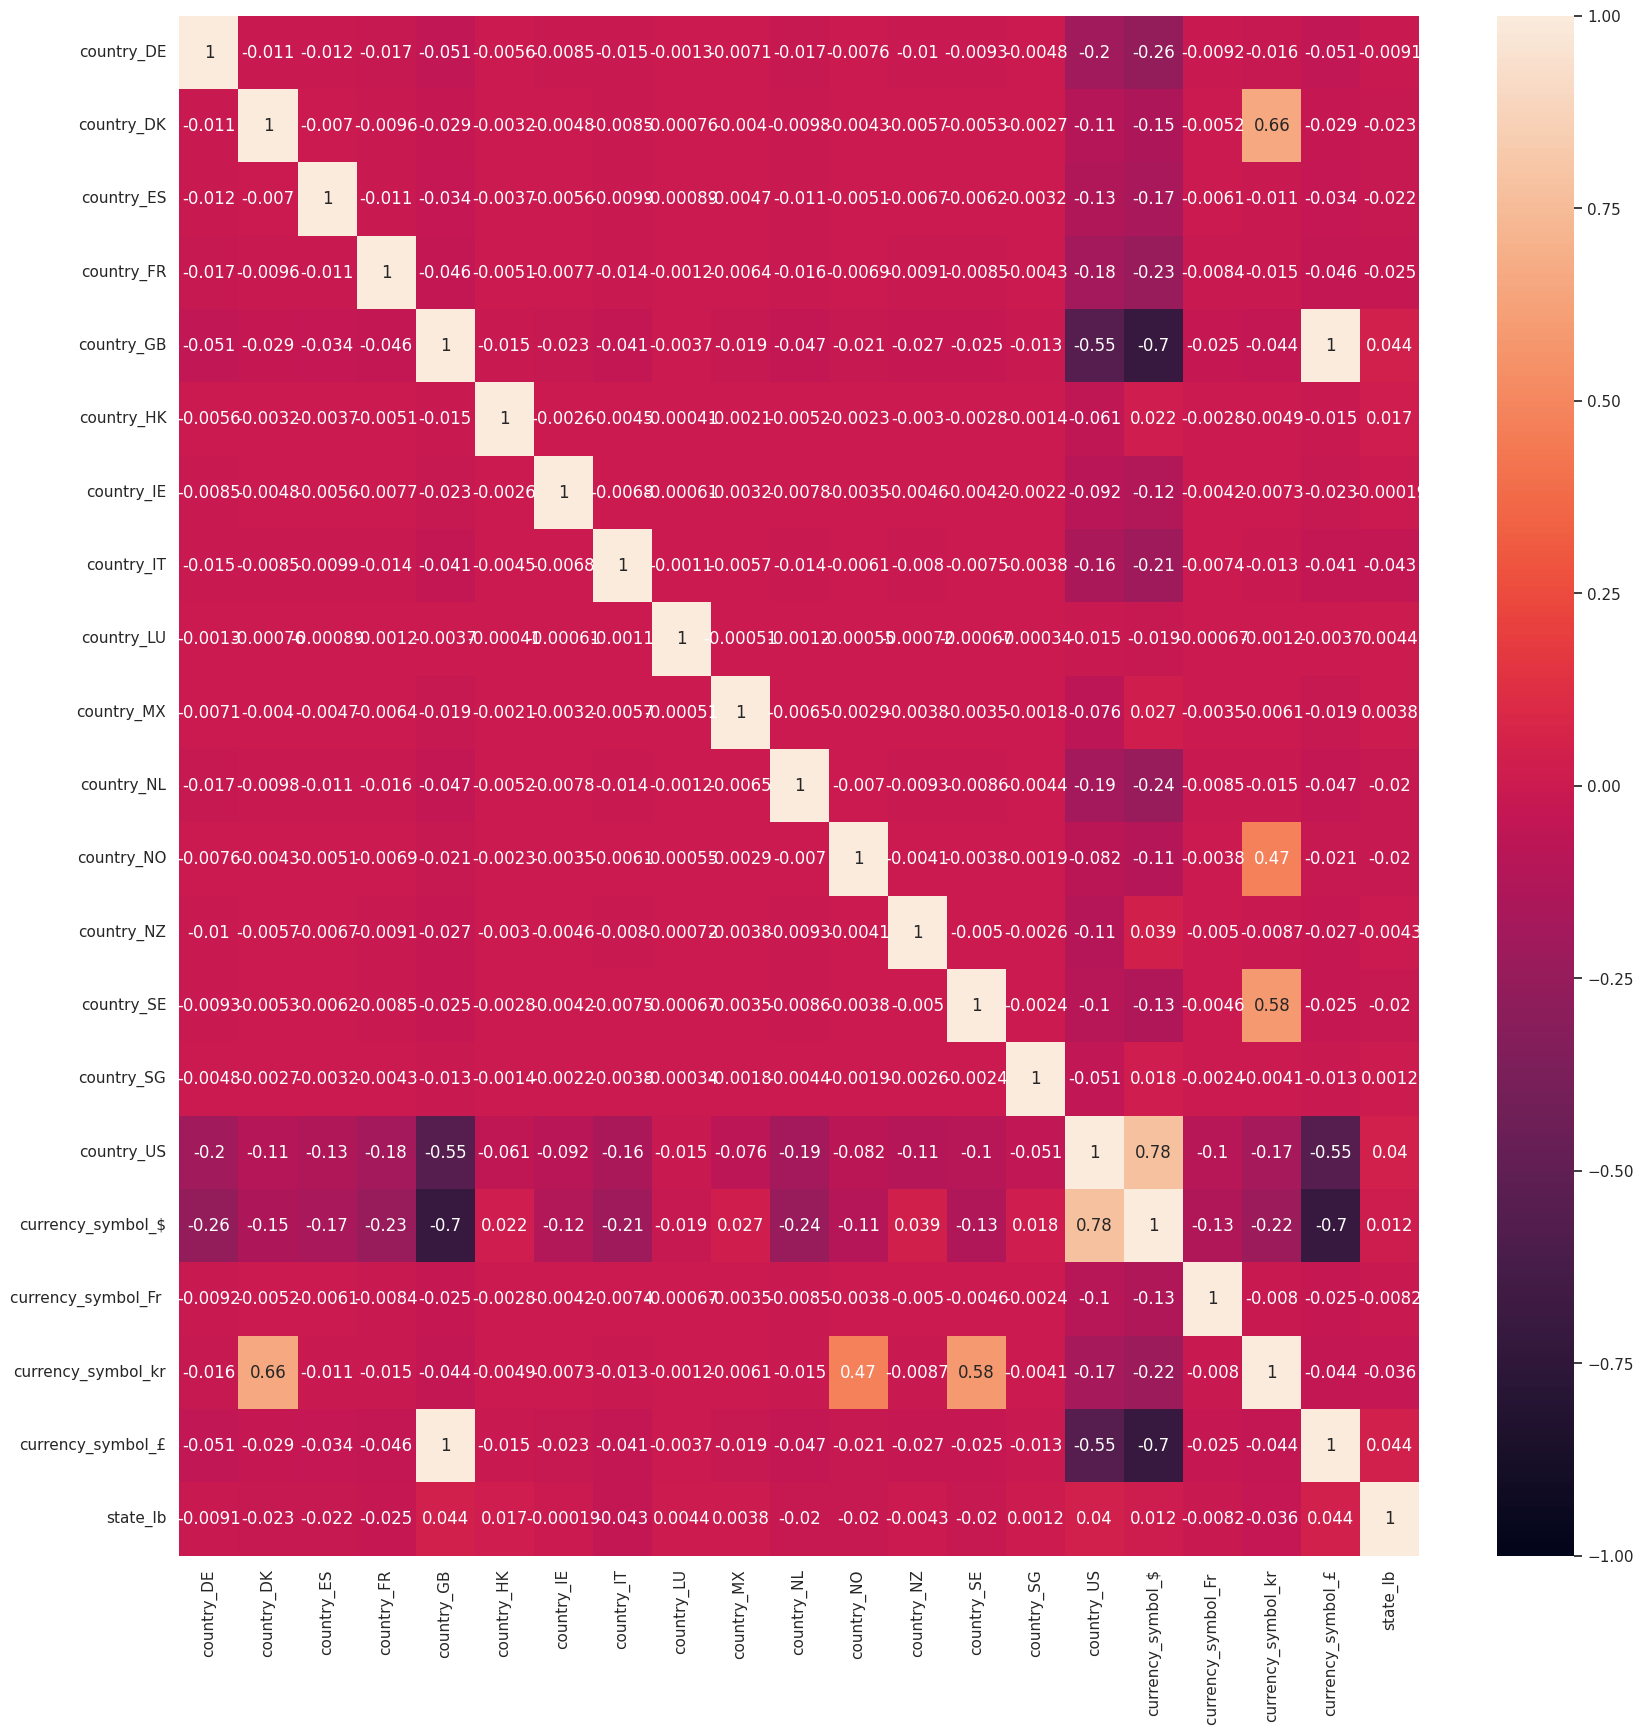

In [ ]:
display_df = pd.concat([full_3.iloc[:,40:60], full_3['state_lb']], axis=1)
display_df.head()
fig, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(display_df.corr(), vmin=-1, vmax=1, annot=True)

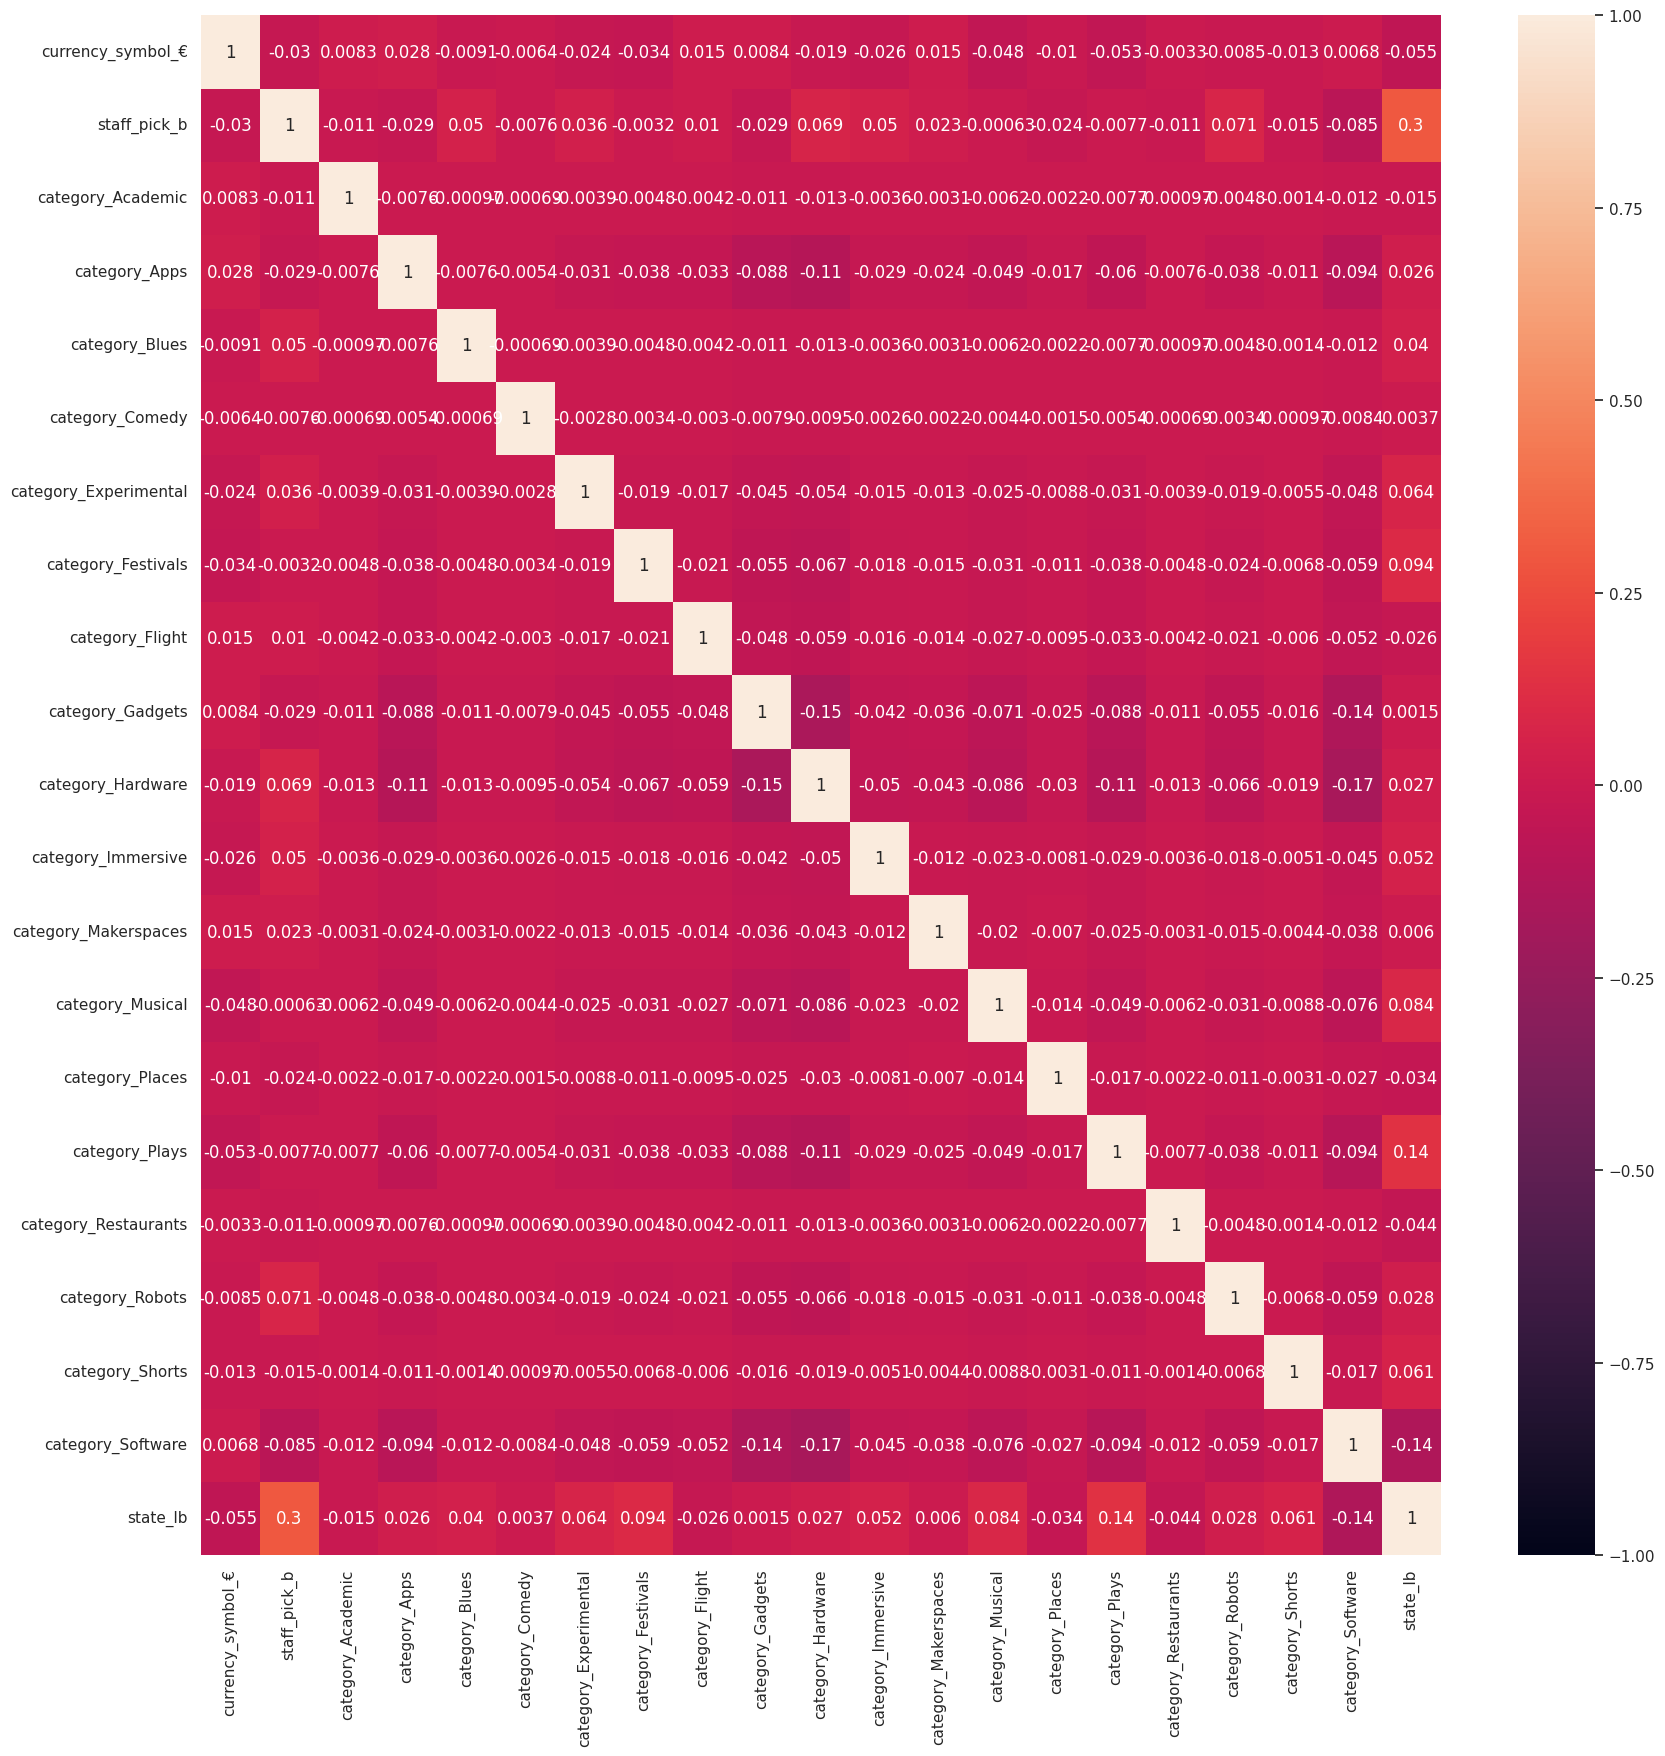

In [ ]:
display_df = pd.concat([full_3.iloc[:,60:80], full_3['state_lb']], axis=1)
display_df.head()
fig, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(display_df.corr(), vmin=-1, vmax=1, annot=True)

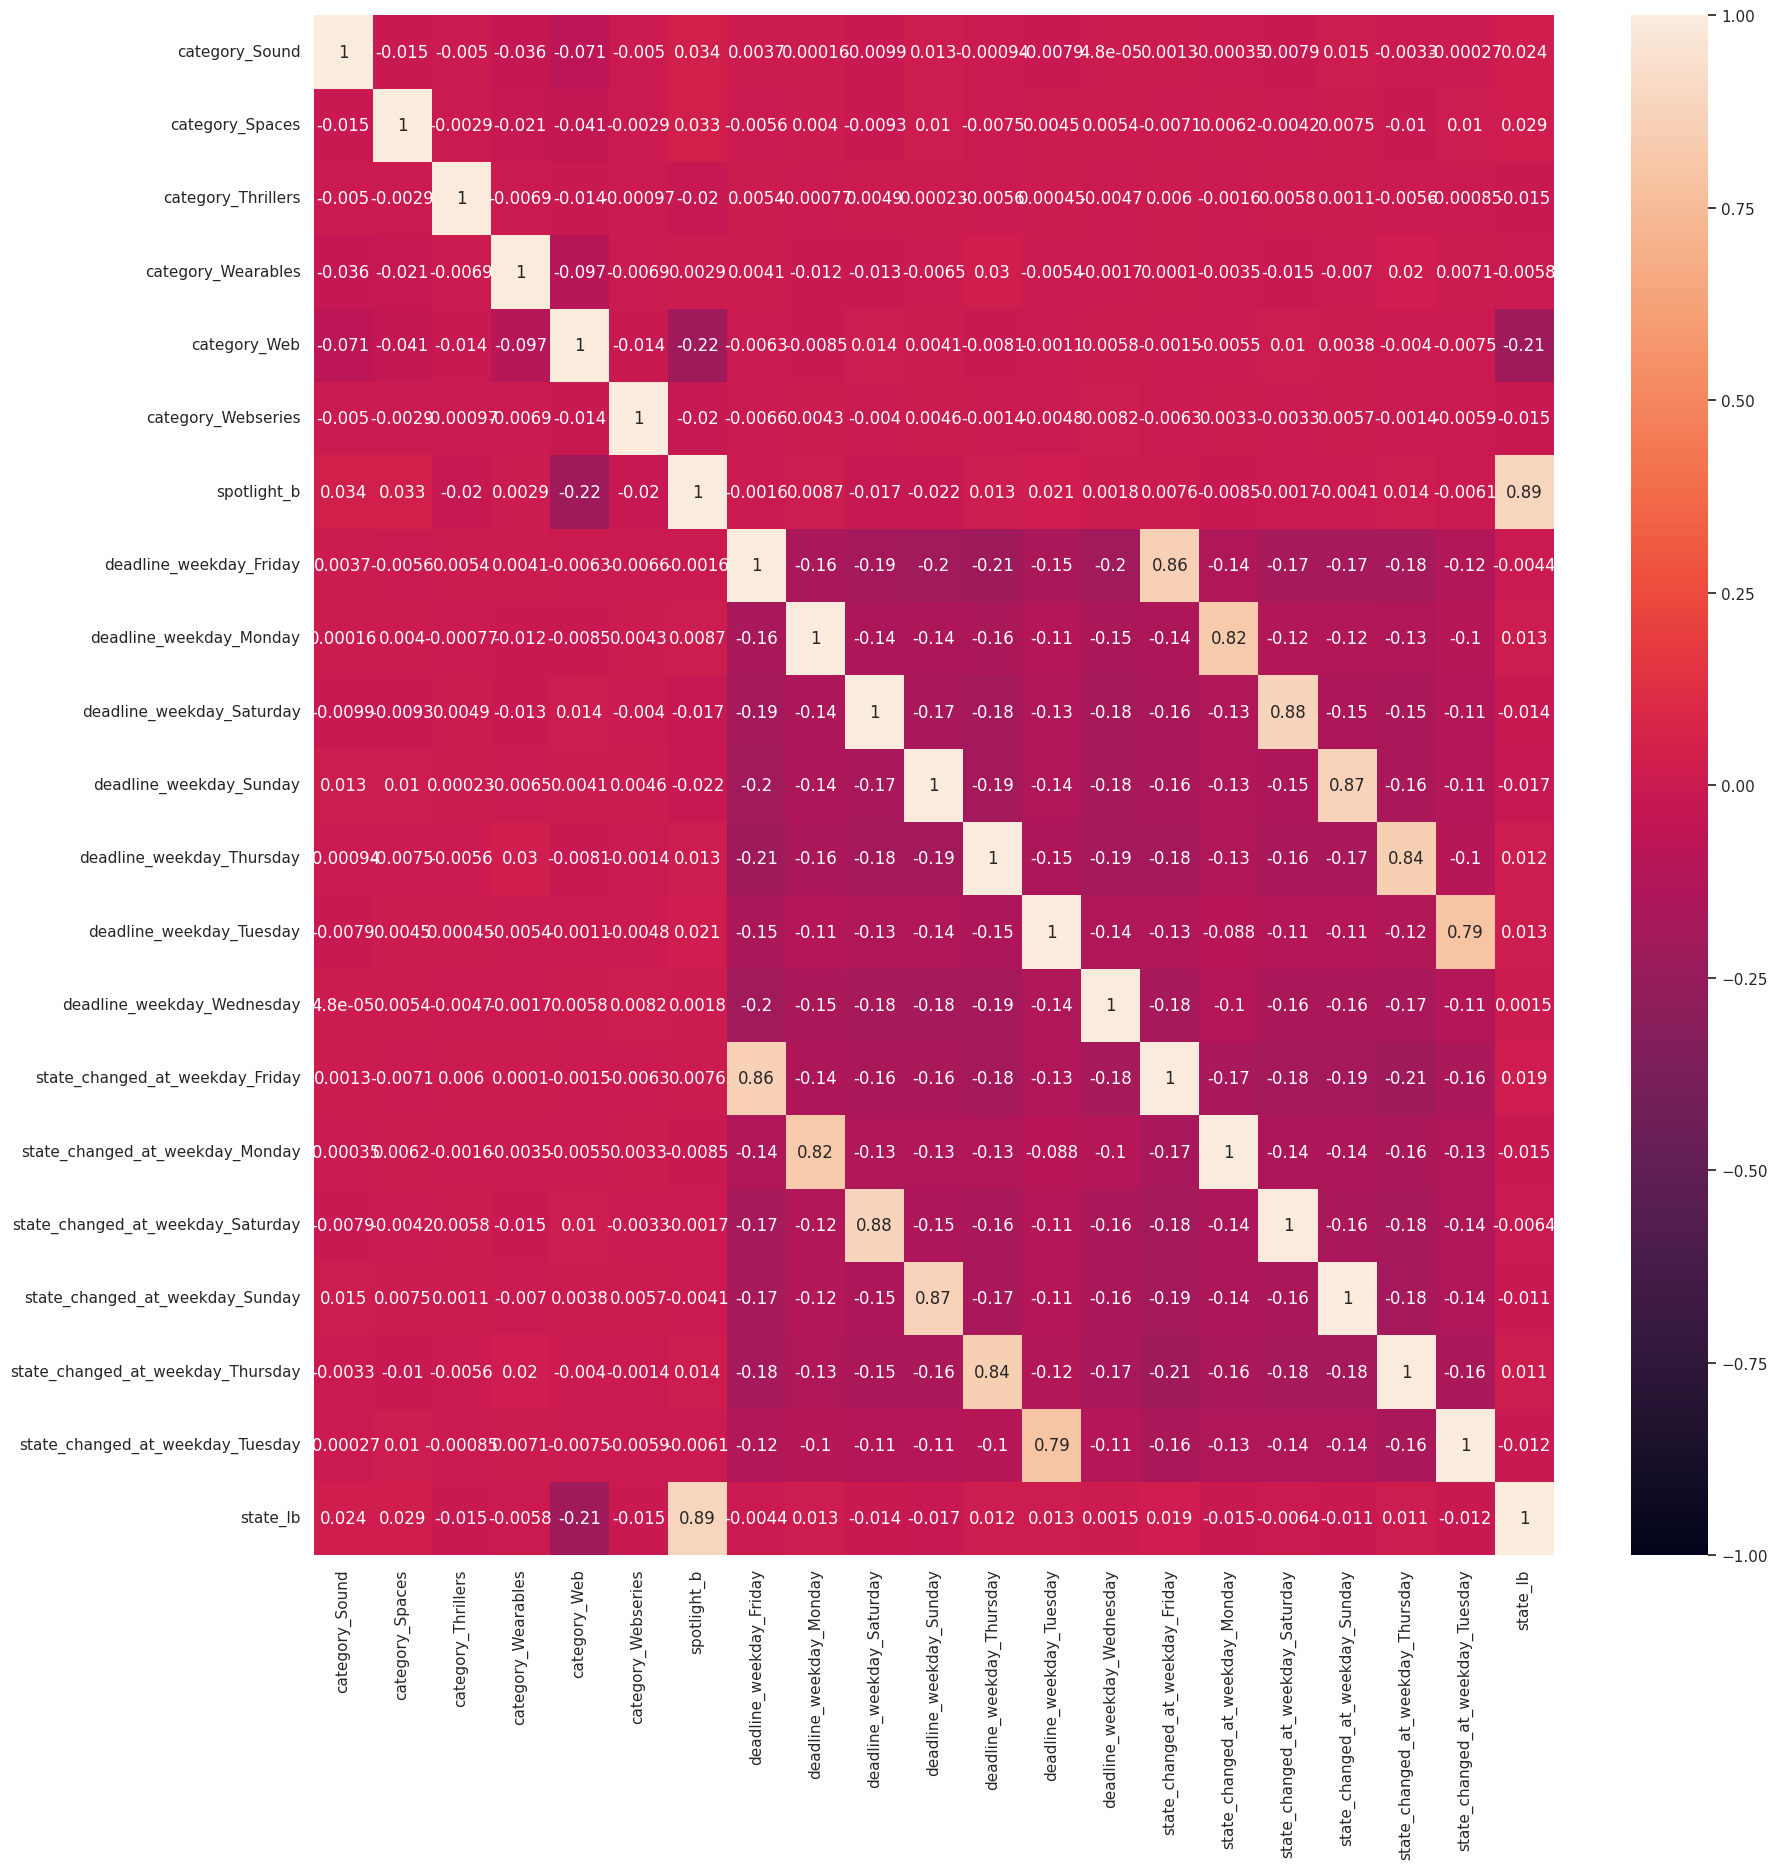

In [ ]:
display_df = pd.concat([full_3.iloc[:,80:100], full_3['state_lb']], axis=1)
display_df.head()
fig, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(display_df.corr(), vmin=-1, vmax=1, annot=True)

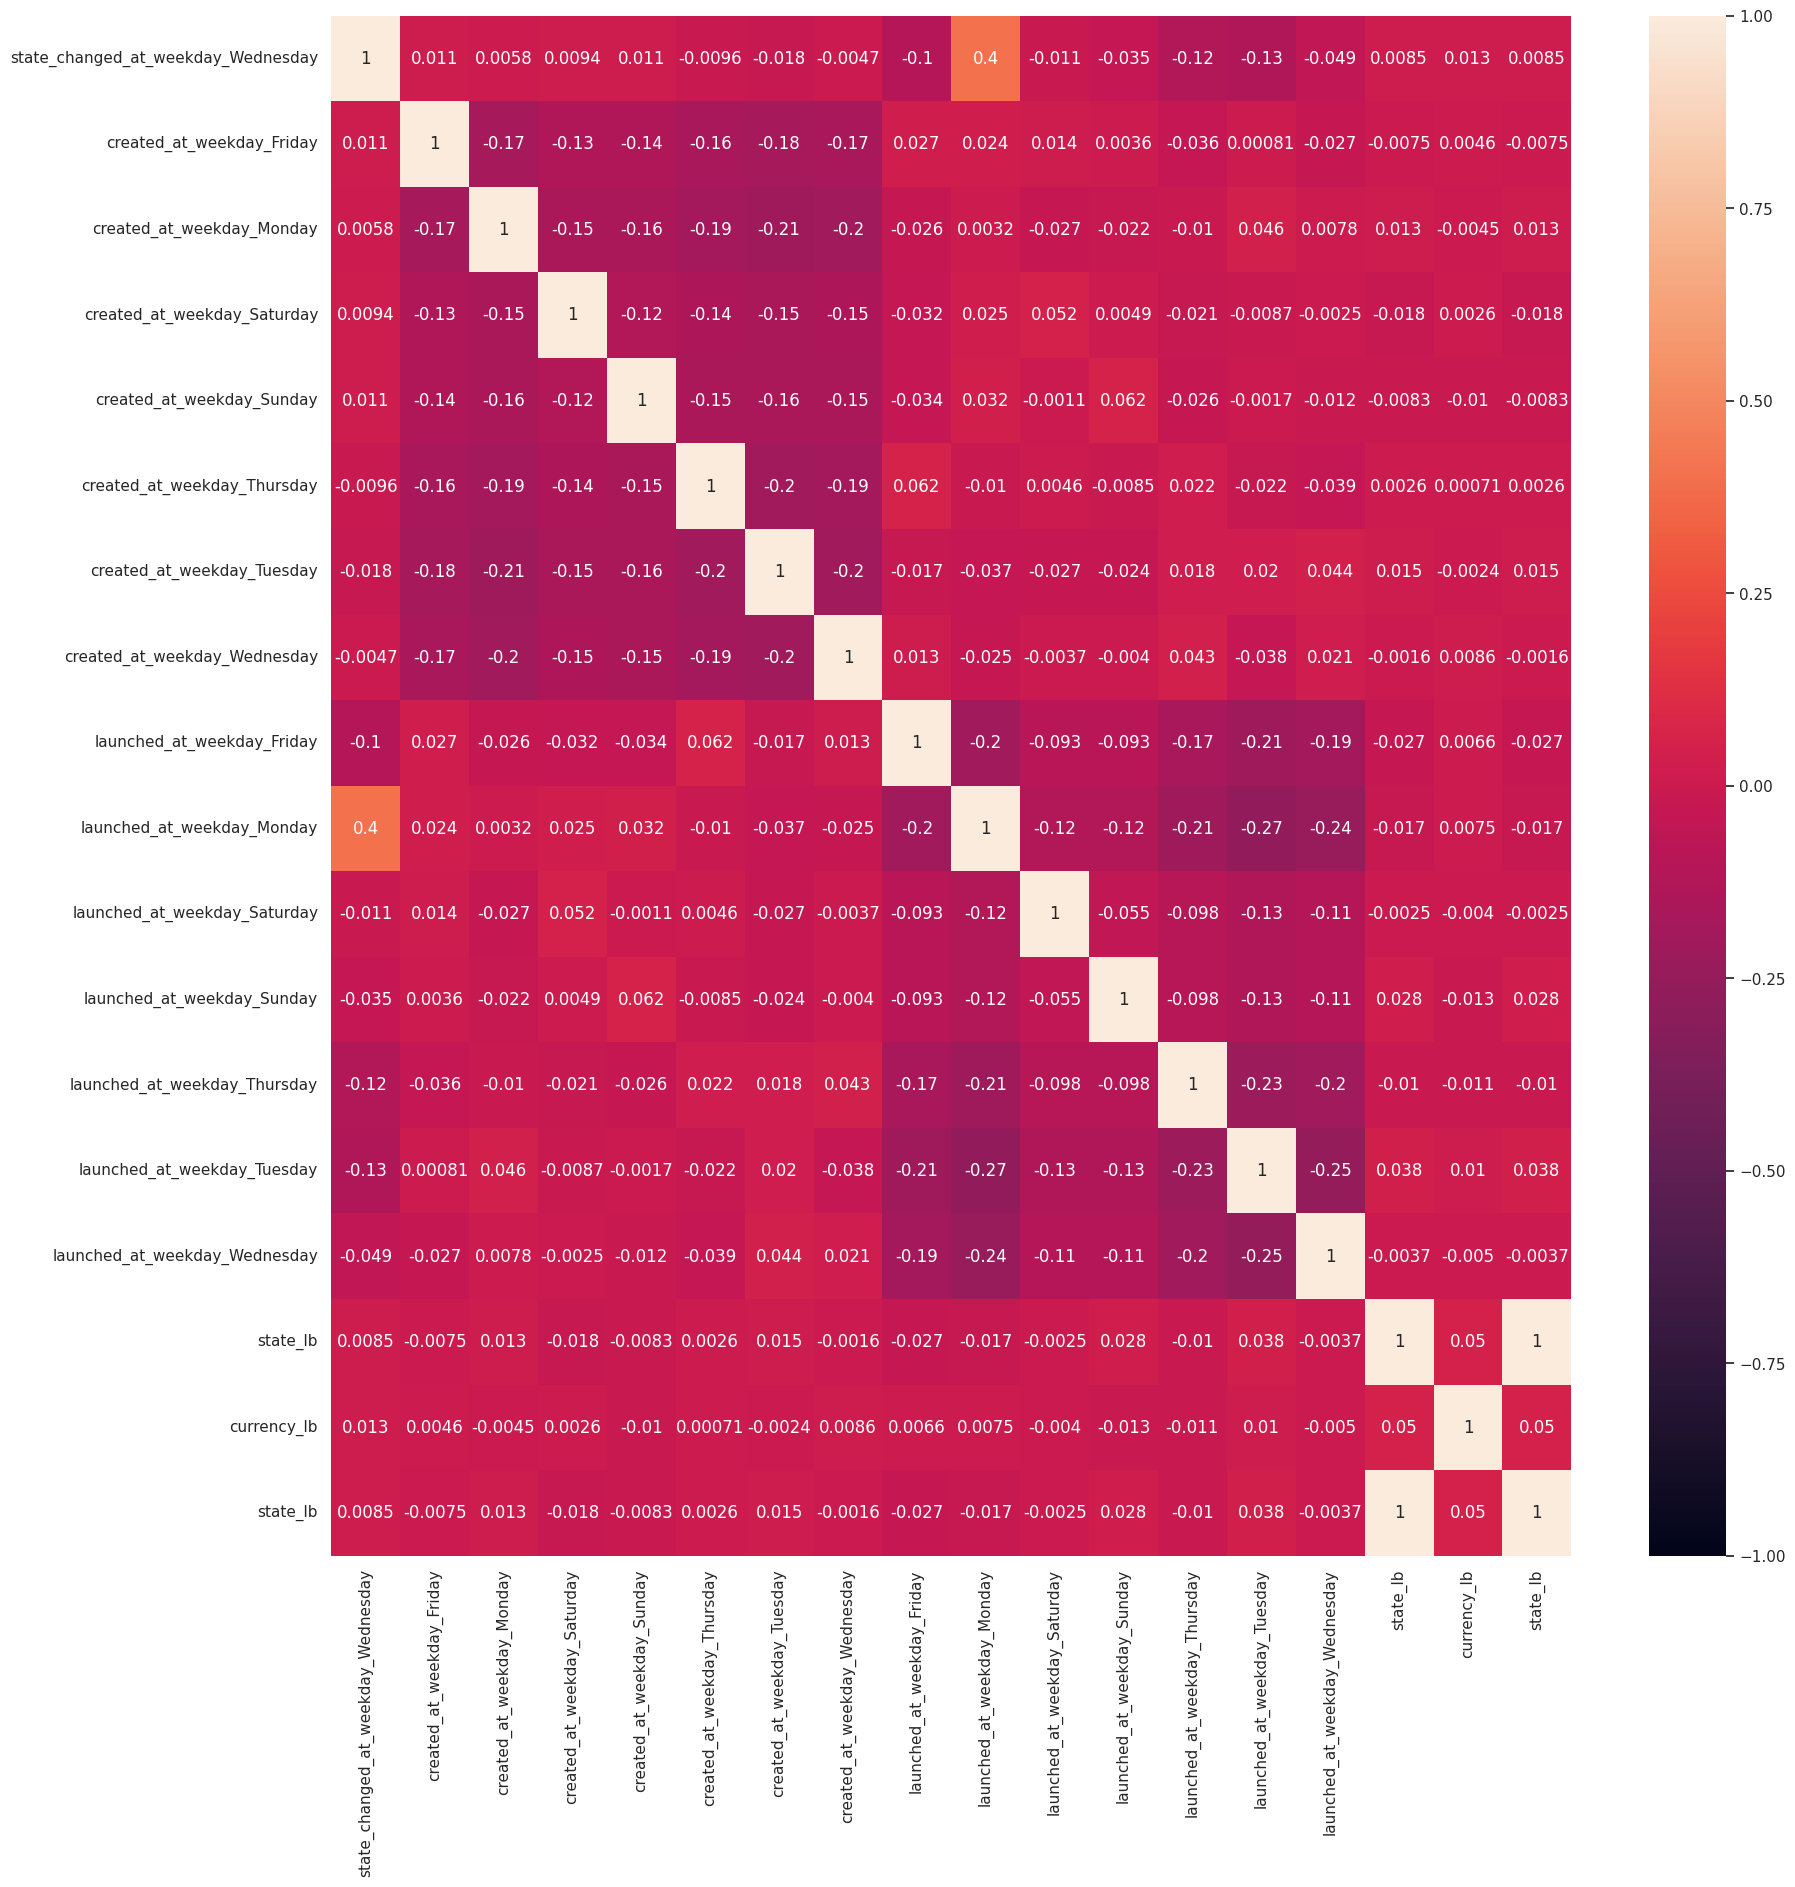

In [ ]:
display_df = pd.concat([full_3.iloc[:,100:117], full_3['state_lb']], axis=1)
display_df.head()
fig, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(display_df.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
full_3.shape

(20632, 117)

In [ ]:
full_3 = full_3.dropna()
full_3.shape

(20627, 117)

In [ ]:
full_3['state_lb'].value_counts()

1    11416
3     6018
0     2455
2      508
4      230
Name: state_lb, dtype: int64

In [ ]:
X = full_3.drop(['state_lb'],axis=1)
y = full_3['state_lb']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle=True)

In [ ]:
# trn, val = train_test_split(full_3, test_size = 0.2, random_state = 1999)

# ##### Input for model
# X_trn, X_val = trn[features], val[features]

# ##### Target column
# y_trn, y_val = trn[target], val[target]

# ##### Features for test data that we will be predicting
# X_test = test_proc[features]

In [ ]:
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(X_train,y_train)
dt.predict(X_test)

array([1, 1, 3, ..., 1, 1, 1])

In [ ]:
importance.shape

(116,)

In [ ]:
X_train.columns.shape

(116,)

In [ ]:
feat_imp = dict()
importance = dt.feature_importances_
# summarize feature importance
for i,v in zip(X_train.columns,importance):
 feat_imp[i] = v


def fun(dict_):
  return dict_[1]
sorted_arr = sorted(feat_imp.items(),reverse=True,key=fun)[:30]
print(sorted_arr)


sum_ = 0
# for y,z in sorted_arr:
#   sum_ = sum_ + z
# print(sum_)

important_colums = []
for y,z in sorted_arr:
  important_colums.append(y)

print(important_colums)


# for x in range()
# plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

[('spotlight_b', 0.5709581277946434), ('launch_to_state_change_days', 0.1909262081903447), ('launch_to_deadline_days', 0.12438313631889761), ('launched_at_yr', 0.05201948573528919), ('disable_communication_b', 0.03324692181825509), ('pledged', 0.004457914564268229), ('goal', 0.0019435540800525205), ('create_to_launch_days', 0.0017305774468352284), ('launched_at_day', 0.0012629095128103812), ('deadline_yr', 0.0011792657480689918), ('name_len_clean', 0.0011375614030621304), ('usd_pledged', 0.0010928228660509014), ('deadline_month', 0.0010527892502874491), ('blurb_len_clean', 0.0009685001490072998), ('name_len', 0.0009610530796559629), ('backers_count', 0.000953213378671777), ('state_changed_at_day', 0.0009500158782648013), ('created_at_hr', 0.0008634146659885596), ('deadline_hr', 0.0008496826810100213), ('static_usd_rate', 0.0006022476060856727), ('deadline_day', 0.0005818811951898659), ('launched_at_month', 0.0005688807006504611), ('blurb_len', 0.0005529655167999589), ('created_at_day',

In [ ]:
X_train['category_Academic'].value_counts()

0    16485
1       16
Name: category_Academic, dtype: int64

In [ ]:
# plt.scatter(X_train['launch_to_state_change_days'], X_train['launch_to_deadline_days'])

# # Add labels and title
# plt.xlabel('Feature Column')
# plt.ylabel('Target Variable')
# plt.title('Scatterplot of Feature Column vs Target Variable with Different Colors')

# # Show the plot
# plt.show()

Experimentation with the most important 20 columns

In [ ]:
X_train_30 = X_train.drop(important_colums, axis=1)
X_test_30 = X_test.drop(important_colums, axis=1)

In [ ]:
# feat_imp = dict()
# importance = dt.feature_importances_
# # summarize feature importance
# for i,v in zip(X_train.columns,importance):
#  feat_imp[i] = v


# def fun(dict_):
#   return dict_[1]
# sorted(feat_imp.items(),reverse=True,key=fun)[:10]

In [ ]:
model_dict = {}

model_dict['Logistic Regression'] = LogisticRegression()
model_dict['Decision Tree'] = DecisionTreeClassifier(random_state = 1)
model_dict['Extra Trees'] = ExtraTreesClassifier(random_state = 1)
model_dict['Random Forest'] = RandomForestClassifier(random_state = 1)
model_dict['AdaBoost'] = AdaBoostClassifier(random_state = 1)
model_dict['Bagging'] = BaggingClassifier(random_state = 1)
model_dict['XGBoost'] = XGBClassifier(random_state = 1)
model_dict['LGBM'] = LGBMClassifier(random_state = 1)
model_dict['Cat'] = CatBoostClassifier(verbose=False, random_state =1)

In [ ]:
def model_test(X_train, X_test, y_train, y_test,model,model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average='macro')
    print('======================================{}======================================='.format(model_name))
    print('Accuracy Score is : {}'.format(accuracy))
    print()
    print('F1 Score is : {}'.format(f1))

In [ ]:
for model_name,model in model_dict.items():
    model_test(X_train_30, X_test_30, y_train, y_test, model, model_name)

======================================Logistic Regression=======================================
Accuracy Score is : 0.83664566165778

F1 Score is : 0.38755067394288795
======================================Decision Tree=======================================
Accuracy Score is : 0.9144449830344159

F1 Score is : 0.6925405561686288
======================================Extra Trees=======================================
Accuracy Score is : 0.9362578768783325

F1 Score is : 0.711173230755062
======================================Random Forest=======================================
Accuracy Score is : 0.9255937954435288

F1 Score is : 0.6934828501976184
======================================AdaBoost=======================================
Accuracy Score is : 0.788899660688318

F1 Score is : 0.5233763406493409
======================================Bagging=======================================
Accuracy Score is : 0.9425593795443529

F1 Score is : 0.7256715756175158
[04:16:41] WARNING: ../src

In [ ]:
for model_name,model in model_dict.items():
  print(model_name," ",sum(cross_val_score(model,X_train_30,y_train,cv=5,n_jobs=-1,scoring='accuracy'))/5)

Logistic Regression   0.8354644781654779
Decision Tree   0.9107931297219393
Extra Trees   0.9357610457804337
Random Forest   0.9253375193926543
AdaBoost   0.7125074495331993
Bagging   0.9390942689543114
XGBoost   0.9570326898185124
LGBM   0.954669126894513
Cat   0.955517611742998


Now we will try to upsample the minority calss using from ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN,SMOTE
sampling_strategy_ = {0: 2500, 1: 9133, 2: 1000, 3:4814, 4:1000}

adasyn = SMOTE(random_state=42,sampling_strategy=sampling_strategy_)
print("Class distribution after ADASYN:", np.bincount(y_train))
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_30, y_train)
print("Class distribution after ADASYN:", np.bincount(y_train_resampled))


Class distribution after ADASYN: [1964 9133  406 4814  184]
Class distribution after ADASYN: [2500 9133 1000 4814 1000]


In [ ]:
for model_name,model in model_dict.items():
    model_test(X_train_resampled, X_test_30, y_train_resampled, y_test, model, model_name)

======================================Logistic Regression=======================================
Accuracy Score is : 0.8330101793504605

F1 Score is : 0.4073735130883196
======================================Decision Tree=======================================
Accuracy Score is : 0.9132331555986427

F1 Score is : 0.7220652868056883
======================================Extra Trees=======================================
Accuracy Score is : 0.9408628211342704

F1 Score is : 0.7284516220196207
======================================Random Forest=======================================
Accuracy Score is : 0.9348036839554047

F1 Score is : 0.7131543432619873
======================================AdaBoost=======================================
Accuracy Score is : 0.773873000484731

F1 Score is : 0.5464271408391655
======================================Bagging=======================================
Accuracy Score is : 0.9413475521085798

F1 Score is : 0.7344875886998591
[04:40:59] WARNING: ../s

In [ ]:
for model_name,model in model_dict.items():
  print(model_name," ",sum(cross_val_score(model,X_train_resampled,y_train,cv=5,n_jobs=-1,scoring='accuracy'))/5)